<a href="https://colab.research.google.com/github/edabezek/MachineLearning/blob/main/ClassificationWithIrisData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:

veriler = pd.read_excel('Iris.xls')
veriler.head()
#150 satır veri var

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


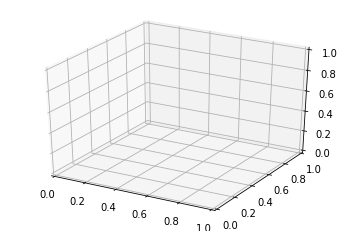

In [ ]:

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,:2]
y= iris.target

Text(0, 0.5, 'Sepal Width')

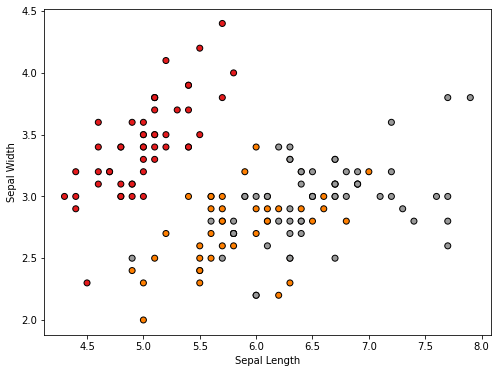

In [ ]:
x_min , x_max =X[:,0].min() - .5,X[:,0].max() + .5
y_min , y_max =X[:,1].min() - .5,X[:,1].max() + .5

plt.figure(2,figsize=(8,6))
plt.clf()

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Set1,edgecolors="k")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")


[]

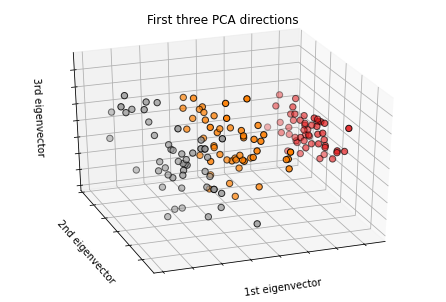

In [ ]:
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks(())
plt.yticks(())

#plot the first three PCA dimensions
fig = plt.figure(1,figsize=(8,6))
ax = Axes3D(fig,elev=-150,azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

In [ ]:
#this cod is helpful in zoom in,rotating,moving,positioning setting & downloading the graph

import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
color='species')
fig.show()

In [ ]:
#A 4th dimension of the data can be represented thanks to the color of the markers. 
#Also, values from the species column are used below to assign symbols to markers.


import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
                    color='petal_length', symbol='species')
fig.show()

In [ ]:
#It is possible to customize the style of the figure through the parameters of px.scatter_3d for some options, 
#or by updating the traces or the layout of the figure through fig.update.


import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='petal_length', size='petal_length', size_max=18,
              symbol='species', opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [ ]:
#3d scatter plots in Dash

import dash  #dash import hatası 
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

df = px.data.iris()

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id="scatter-plot"),
    html.P("Petal Width:"),
    dcc.RangeSlider(
        id='range-slider',
        min=0, max=2.5, step=0.1,
        marks={0: '0', 2.5: '2.5'},
        value=[0.5, 2]
    ),
])

@app.callback(
    Output("scatter-plot", "figure"), 
    [Input("range-slider", "value")])
def update_bar_chart(slider_range):
    low, high = slider_range
    mask = (df.petal_width > low) & (df.petal_width < high)

    fig = px.scatter_3d(df[mask], 
        x='sepal_length', y='sepal_width', z='petal_width',
        color="species", hover_data=['petal_width'])
    return fig
app.run_server(debug=True)

#Verilerin Eğitim ve Test için Bölünmesi

In [ ]:
#verileri görselleştirme için ayrı kodlar kullandık , oradaki verileri dikkate alma(kütüphaneden veri çektik.)
x = veriler.iloc[:,1:4].values #bağımsız değişkenler
y = veriler.iloc[:,4:].values #bağımlı değişken


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)


#Verilerin Ölçeklenmesi

In [ ]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)



#Lojistik Regresyon

In [ ]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train)

y_pred_logic = logr.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_logic = confusion_matrix(y_test,y_pred_logic)
print("Lojistik")
print(cm_logic)

Lojistik
[[16  0  0]
 [ 0 18  1]
 [ 0  2 13]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



#KNN

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn.fit(X_train,y_train)

y_pred_knn = knn.predict(X_test)

cm_knn = confusion_matrix(y_test,y_pred_knn)
print("KNN")
print(cm_knn)

KNN
[[16  0  0]
 [ 0 18  1]
 [ 0  2 13]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



#SVC

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)

y_pred_svc = svc.predict(X_test)

cm_svc = confusion_matrix(y_test,y_pred_svc)
print('SVC')
print(cm_svc)



SVC
[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



#Naive Bayes

In [ ]:

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_gaus = gnb.predict(X_test)

cm_gnb = confusion_matrix(y_test,y_pred_gaus)
print('GNB')
print(cm_gnb)

GNB
[[16  0  0]
 [ 0 19  0]
 [ 0  2 13]]


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



#Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy')

dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)

cm_dtc = confusion_matrix(y_test,y_pred_dtc)
print('DTC')
print(cm_dtc)


DTC
[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]


#Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion = 'entropy')
rfc.fit(X_train,y_train)

y_pred_rfc = rfc.predict(X_test)
cm_rfc = confusion_matrix(y_test,y_pred_rfc)
print('RFC')
print(cm_rfc)


RFC
[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



#ROC , TPR, FPR değerleri 

In [ ]:
y_proba = rfc.predict_proba(X_test)
print(y_test)
print(y_proba[:,0])

from sklearn import metrics
fpr , tpr , thold = metrics.roc_curve(y_test,y_proba[:,0],pos_label='e')
print(fpr)
print(tpr)


Confusion Matrix Karşılaştırma

In [ ]:
print("Lojistik")
print(cm_logic)

print("KNN")
print(cm_knn)

print('SVC')
print(cm_svc)

print('GNB')
print(cm_gnb)

print('DTC')
print(cm_dtc)

print('RFC')
print(cm_rfc)

Lojistik
[[16  0  0]
 [ 0 18  1]
 [ 0  2 13]]
KNN
[[16  0  0]
 [ 0 18  1]
 [ 0  2 13]]
SVC
[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]
GNB
[[16  0  0]
 [ 0 19  0]
 [ 0  2 13]]
DTC
[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]
RFC
[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]
